# EDA. Dataset: Amazon reviews. Musical Instruments

https://cseweb.ucsd.edu/~jmcauley/datasets/amazon_v2/

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from wordcloud import WordCloud
from collections import Counter
from nltk.util import ngrams
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


folder_path = "D:/WUT/NLP/"
data_path = folder_path + "Musical_Instruments.json"
meta_path = folder_path + "meta_Musical_Instruments.json"

def read_json_array(path):
  data = []
  with open(path, 'r') as file:
    for line in file:
      json_object = json.loads(line.strip())
      data.append(json_object)
  return data

data = read_json_array(data_path)
meta = read_json_array(meta_path)

In [2]:
texts = [review['reviewText'] for review in data if 'reviewText' in review]
print(f'Amount: {len(texts)}')

Amount: 1511675


In [ ]:
texts_length = [len(text) for text in texts]
pd.Series(texts_length).describe()

count    1.511675e+06
mean     2.663293e+02
std      4.521849e+02
min      1.000000e+00
25%      5.000000e+01
50%      1.310000e+02
75%      2.970000e+02
max      3.256800e+04
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2f0078a6b00>,
 'caps': [<matplotlib.lines.Line2D at 0x2f0078a7040>,
 'boxes': [<matplotlib.lines.Line2D at 0x2f0078a6860>],
 'medians': [<matplotlib.lines.Line2D at 0x2f0078a7580>],
 'fliers': [<matplotlib.lines.Line2D at 0x2f0078a7820>],
 'means': []}

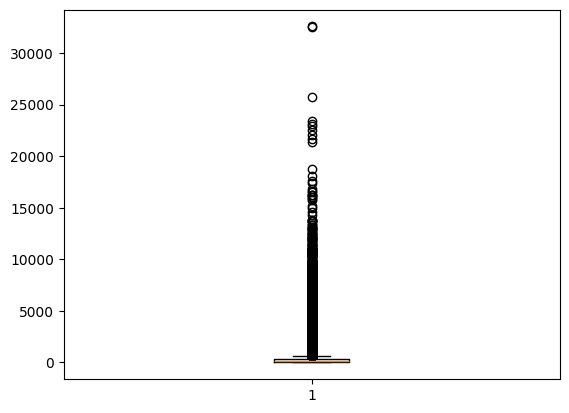

In [11]:
# filtered_lengths = [length for length in texts_length if length < 1000]
plt.boxplot(texts_length)

50% of examples have 50 characters or less in the text. 75% of texts are shorter than 297 characters. Max lenth of the text (32568) is an extreme outlier

In [ ]:
def tokenize(text):
    """
    Tokenize single text example:
        remove punctruation and lowercase
        split by spaces
        remove stopwords
    """
    text = re.sub(r'[^\w\s]', '', text.lower())  # Remove punctuation and lowercase
    tokens = text.split()  # Simple split by spaces
    tokens = [token for token in tokens if token not in ENGLISH_STOP_WORDS]  # Remove stopwords
    return tokens

tokenized_texts = [tokenize(text) for text in texts]
all_words = [word for words in tokenized_texts for word in words]
unigram_counts = Counter(all_words).most_common(15)

print("Most common words in dataset:")
pd.DataFrame(unigram_counts, columns=['Word', 'Count']).sort_values(by='Count', ascending=False)

Most common words in dataset:


,Word,Count
0,great,499979
1,good,365396
2,sound,327694
3,guitar,316923
4,just,273734
5,like,265667
6,use,249300
7,quality,211216
8,price,207315
9,really,173646


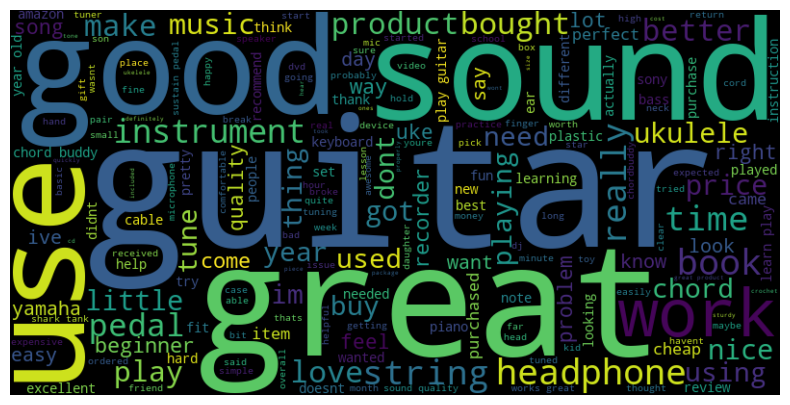

In [15]:
wordcloud = WordCloud(width=800, height=400).generate(' '.join(all_words[:100000]))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
analyzer = SentimentIntensityAnalyzer()
sentiment = pd.Series(texts[:100000]).apply(lambda x: analyzer.polarity_scores(x)['compound'])
print("Sentiment:")
sentiment.describe()

Sentiment:


count    100000.000000
mean          0.556390
std           0.411669
min          -0.996100
25%           0.421500
50%           0.659700
75%           0.867300
max           0.999900
dtype: float64